In [86]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

In [87]:
x=np.genfromtxt('manchassolares.txt')
tiempo=[]
manchas=[]
for i in range(0,len(x)):
    if (x[i][4]!=-1):
        tiempo.append(x[i][3])
        manchas.append(x[i][4])
y=manchas
x=tiempo

Aquí tenemos los tiempos y las manchas, con los días en que no se realizó observación filtrados. Luego, el eje x es el tiempo y el eje y las manchas.

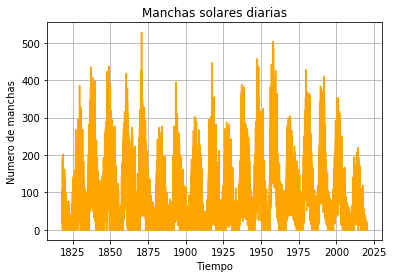

In [88]:
plt.plot(x,y,color='orange')
plt.xlabel('Tiempo')
plt.ylabel('Numero de manchas')
plt.title('Manchas solares diarias')
plt.grid(True)
plt.savefig('manchasdiariasplot')

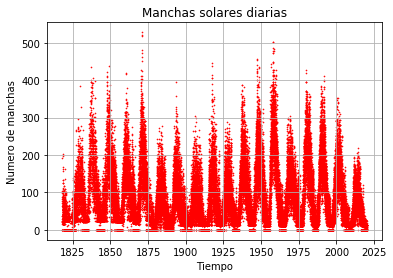

In [89]:
plt.scatter(x,y,s=0.4,color='red',)
plt.xlabel('Tiempo')
plt.ylabel('Numero de manchas')
plt.title('Manchas solares diarias')
plt.grid(True)
plt.savefig('manchasdiarias')

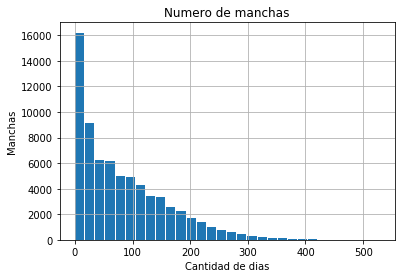

In [90]:
plt.hist(y,bins=30,width=16)
plt.title("Numero de manchas")
plt.grid(True)
plt.ylabel("Manchas")
plt.xlabel("Cantidad de dias")
plt.savefig('histogramadias')

In [91]:
n, intervalos = np.histogram(manchas,bins=30)

In [92]:
print(intervalos[:-1])
print(intervalos)
print(n)

[  0.   17.6  35.2  52.8  70.4  88.  105.6 123.2 140.8 158.4 176.  193.6
 211.2 228.8 246.4 264.  281.6 299.2 316.8 334.4 352.  369.6 387.2 404.8
 422.4 440.  457.6 475.2 492.8 510.4]
[  0.   17.6  35.2  52.8  70.4  88.  105.6 123.2 140.8 158.4 176.  193.6
 211.2 228.8 246.4 264.  281.6 299.2 316.8 334.4 352.  369.6 387.2 404.8
 422.4 440.  457.6 475.2 492.8 510.4 528. ]
[16200  9174  6255  6164  5024  4891  4320  3446  3323  2565  2227  1680
  1403  1022   799   591   465   312   250   163   112    68    43    25
    19     8     4     5     2     3]


Ahora, proponemos una función que siga la tendencia de este histograma. Proponemos $f(x)= a \cdot e^{-bx} + c$

In [129]:
def f(x,a,b,c):
    return a*np.exp(-b*x) +c

A través del paquete scipy, ocuparemos curve_fit para obtener los coeficientes a, b y c.

In [130]:
(a,b,c),_=curve_fit(f,intervalos[:-1],n)
print(a,b,c)

13486.04418941226 0.01333578805374353 205.14969965302066


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


De esta manera, tenemos que nuestra función es: $f(x) = 13486.04418941226 \cdot e^{-0.01333578805374353x} + 205.14969965302066$

Notar que este es el mejor arreglo que tenemos. Dado que el método ocupado es de 'mínimos cuadrados', calcularemos $\chi ^{2}$

In [131]:
chicuad = np.sum((n-f(intervalos[:-1],a,b,c))**2)
print(chicuad)

20091522.32810127


Luego, $\chi^{2} = 20091522.32810127$ 

Text(0.5, 1.0, 'Histograma y ajuste funcional de tendencia de datos')

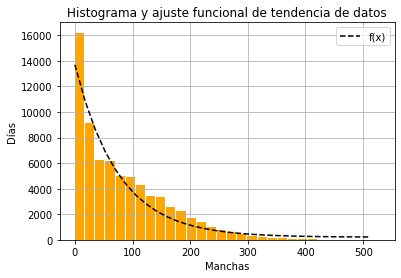

In [132]:
plt.hist(manchas,bins=30,width=16,color='orange')
plt.plot(intervalos[:-1],f(intervalos[:-1],a,b,c),'--',color='black',label='f(x)')
plt.legend()
plt.grid(True)
plt.xlabel('Manchas')
plt.ylabel('Días')
plt.title('Histograma y ajuste funcional de tendencia de datos')

Ahora, haremos un scatter de residuos para ver si existe una tendencia en la aletoriedad de los datos

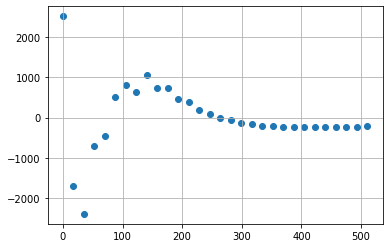

In [134]:
ep =n-(f(intervalos[:-1],a,b,c))
plt.scatter(intervalos[:-1],ep)
plt.grid(True)